#**1. Analysis of Data**

In [1]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
dataFrame = pd.read_csv("/content/drive/MyDrive/AI511-HOMELOAN-2022/train_data.csv")

dataFrame_test = pd.read_csv("/content/drive/MyDrive/AI511-HOMELOAN-2022/test_data.csv")

desc=pd.read_csv("/content/drive/MyDrive/AI511-HOMELOAN-2022/columns_description.csv")

In [4]:
dataFrame

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,450407,Cash loans,F,N,Y,1,67500.0,227520.0,11065.5,180000.0,...,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0,0
1,271298,Cash loans,M,Y,Y,1,247500.0,1882372.5,65560.5,1719000.0,...,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0,0
2,122238,Cash loans,M,Y,Y,1,180000.0,101880.0,10827.0,90000.0,...,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0,0
3,305311,Cash loans,M,N,N,0,81000.0,405000.0,20677.5,405000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0
4,414121,Cash loans,F,N,Y,0,157500.0,888840.0,29506.5,675000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184501,439663,Cash loans,F,N,Y,1,135000.0,143910.0,15498.0,135000.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
184502,385689,Revolving loans,F,N,Y,0,202500.0,360000.0,18000.0,360000.0,...,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0
184503,153567,Cash loans,F,N,N,0,135000.0,900000.0,45954.0,900000.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
184504,365526,Cash loans,F,N,Y,0,123300.0,744988.5,20484.0,744988.5,...,0,0,0,0.0,0.0,0.0,4.0,0.0,2.0,0


In [5]:
dataFrame_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,367294,Cash loans,F,N,Y,0,180000.0,265306.5,25317.0,252000.0,...,0,0,0,0,0.0,0.0,0.0,1.0,2.0,5.0
1,439847,Cash loans,F,N,Y,0,202500.0,346500.0,21069.0,346500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
2,380562,Cash loans,M,Y,N,0,360000.0,545040.0,36553.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,5.0
3,407238,Cash loans,F,N,Y,0,135000.0,307557.0,20682.0,265500.0,...,0,0,0,0,0.0,0.0,1.0,0.0,1.0,2.0
4,239910,Cash loans,F,N,Y,0,157500.0,1056447.0,31018.5,922500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123000,128638,Cash loans,F,Y,Y,1,117000.0,675000.0,32602.5,675000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
123001,169821,Cash loans,F,N,Y,0,225000.0,1006920.0,42790.5,900000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,0.0
123002,442166,Cash loans,F,N,Y,0,153000.0,625536.0,26851.5,540000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
123003,301605,Cash loans,M,N,Y,0,180000.0,1089000.0,31972.5,1089000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0


#**2. Pre-Processing**

##**2.1 Dropping columns with more than 65% Nan values**

In [6]:
drop_columns=[]

for i in dataFrame.columns:
  if(((dataFrame[i].isna().sum()/dataFrame.shape[0])*100) > 65):
    print(i,dataFrame[i].isna().sum(),(dataFrame[i].isna().sum()/dataFrame.shape[0])*100)
    drop_columns.append(i)
    del dataFrame[i]

print(dataFrame.shape[1])

for i in dataFrame_test.columns:
  if i in drop_columns:
    print(i)
    del dataFrame_test[i]

print(dataFrame_test.shape[1])

OWN_CAR_AGE 121633 65.92360140049645
YEARS_BUILD_AVG 122757 66.53279568144126
COMMONAREA_AVG 128971 69.90070783605952
FLOORSMIN_AVG 125244 67.88071932620078
LIVINGAPARTMENTS_AVG 126212 68.40536351121372
NONLIVINGAPARTMENTS_AVG 128146 69.45356790565076
YEARS_BUILD_MODE 122757 66.53279568144126
COMMONAREA_MODE 128971 69.90070783605952
FLOORSMIN_MODE 125244 67.88071932620078
LIVINGAPARTMENTS_MODE 126212 68.40536351121372
NONLIVINGAPARTMENTS_MODE 128146 69.45356790565076
YEARS_BUILD_MEDI 122757 66.53279568144126
COMMONAREA_MEDI 128971 69.90070783605952
FLOORSMIN_MEDI 125244 67.88071932620078
LIVINGAPARTMENTS_MEDI 126212 68.40536351121372
NONLIVINGAPARTMENTS_MEDI 128146 69.45356790565076
FONDKAPREMONT_MODE 126254 68.42812699858
105
OWN_CAR_AGE
YEARS_BUILD_AVG
COMMONAREA_AVG
FLOORSMIN_AVG
LIVINGAPARTMENTS_AVG
NONLIVINGAPARTMENTS_AVG
YEARS_BUILD_MODE
COMMONAREA_MODE
FLOORSMIN_MODE
LIVINGAPARTMENTS_MODE
NONLIVINGAPARTMENTS_MODE
YEARS_BUILD_MEDI
COMMONAREA_MEDI
FLOORSMIN_MEDI
LIVINGAPARTMENTS_M

##**2.2 Replacing Nan values which has datatype not as object with median values**

In [7]:
#Replacing Nan values of train data
count=0
for i in dataFrame.columns[dataFrame.isnull().any()]:
  count+=1
  if(dataFrame[i].dtypes==object):
    print(i)

#Replacing Nan values of test data
count=0
for i in dataFrame_test.columns[dataFrame_test.isnull().any()]:
  count+=1
  if(dataFrame_test[i].dtypes==object):
    print(i)


NAME_TYPE_SUITE
OCCUPATION_TYPE
HOUSETYPE_MODE
WALLSMATERIAL_MODE
EMERGENCYSTATE_MODE
NAME_TYPE_SUITE
OCCUPATION_TYPE
HOUSETYPE_MODE
WALLSMATERIAL_MODE
EMERGENCYSTATE_MODE


In [8]:
l=[]
for i in dataFrame.columns[dataFrame.isnull().any()]:
  print(i)
  l.append(i)

AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
OCCUPATION_TYPE
CNT_FAM_MEMBERS
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
LANDAREA_AVG
LIVINGAREA_AVG
NONLIVINGAREA_AVG
APARTMENTS_MODE
BASEMENTAREA_MODE
YEARS_BEGINEXPLUATATION_MODE
ELEVATORS_MODE
ENTRANCES_MODE
FLOORSMAX_MODE
LANDAREA_MODE
LIVINGAREA_MODE
NONLIVINGAREA_MODE
APARTMENTS_MEDI
BASEMENTAREA_MEDI
YEARS_BEGINEXPLUATATION_MEDI
ELEVATORS_MEDI
ENTRANCES_MEDI
FLOORSMAX_MEDI
LANDAREA_MEDI
LIVINGAREA_MEDI
NONLIVINGAREA_MEDI
HOUSETYPE_MODE
TOTALAREA_MODE
WALLSMATERIAL_MODE
EMERGENCYSTATE_MODE
OBS_30_CNT_SOCIAL_CIRCLE
DEF_30_CNT_SOCIAL_CIRCLE
OBS_60_CNT_SOCIAL_CIRCLE
DEF_60_CNT_SOCIAL_CIRCLE
DAYS_LAST_PHONE_CHANGE
AMT_REQ_CREDIT_BUREAU_HOUR
AMT_REQ_CREDIT_BUREAU_DAY
AMT_REQ_CREDIT_BUREAU_WEEK
AMT_REQ_CREDIT_BUREAU_MON
AMT_REQ_CREDIT_BUREAU_QRT
AMT_REQ_CREDIT_BUREAU_YEAR


In [9]:
dataFrame.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'TARGET'],
      dtype='object', length=105)

In [10]:
for i in dataFrame.columns:
  print(dataFrame[i].unique())

[450407 271298 122238 ... 153567 365526 125605]
['Cash loans' 'Revolving loans']
['F' 'M' 'XNA']
['N' 'Y']
['Y' 'N']
[ 1  0  2  3  4  5 10  7  6 14 12 19  8  9]
[  67500.   247500.   180000.  ...   58063.5   70209.  1147500. ]
[ 227520.  1882372.5  101880.  ... 1317807.   284985.   744988.5]
[11065.5 65560.5 10827.  ... 74128.5 56749.5  8559. ]
[ 180000.  1719000.    90000.   405000.   675000.  1350000.   900000.
   45000.   841500.   225000.   495000.   855000.   315000.   990000.
  463500.   450000.   810000.    94500.  1318500.  1363500.   270000.
 1485000.   382500.   193500.   162000.   166500.   135000.   337500.
  657000.   423000.  1575000.   553500.   477000.   148500.   783000.
  454500.   229500.   157500.  1354500.  1372500.  1759500.   544500.
 2250000.  1125000.   603000.   679500.   472500.   445500.   360000.
 1417500.   427500.   693000.   252000.   751500.  1800000.   202500.
  297000.   328500.   922500.   112500.   283500.   238500.  1152000.
  913500.  1003500.   4

In [11]:
#Filling na with median for train data

for i in dataFrame.columns:
  if(dataFrame[i].isna().any() and dataFrame[i].dtypes!=object):
    dataFrame[i]=dataFrame[i].fillna(dataFrame[i].median())


#Filling na with median for test data

for i in dataFrame_test.columns:
  if(dataFrame_test[i].isna().any() and dataFrame_test[i].dtypes!=object):
    dataFrame_test[i]=dataFrame_test[i].fillna(dataFrame_test[i].median())


##**2.3 Replacing Nan values which has datatype as object with mode values**

In [12]:
#Filling object Nan with mode for train data
for i in dataFrame.columns:
  if(dataFrame[i].isna().any() and dataFrame[i].dtypes==object):
    dataFrame[i]=dataFrame[i].fillna(dataFrame[i].mode())


#Filling object Nan with mode for test data
for i in dataFrame_test.columns:
  if(dataFrame_test[i].isna().any() and dataFrame_test[i].dtypes==object):
    dataFrame_test[i]=dataFrame_test[i].fillna(dataFrame_test[i].mode())


##**2.4 Performing one hot encoding for columns with datatype as object**

In [13]:
#Performing one hot encoding for train data
columns_for_one_hot_encoding=[]
for i in dataFrame.columns:
  if(dataFrame[i].dtypes==object):
    columns_for_one_hot_encoding.append(i)
print(columns_for_one_hot_encoding)


#Performing one hot encoding for test data
columns_for_one_hot_encoding=[]
for i in dataFrame_test.columns:
  if(dataFrame_test[i].dtypes==object):
    columns_for_one_hot_encoding.append(i)
print(columns_for_one_hot_encoding)



['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']


In [14]:
dataFrame=pd.get_dummies(dataFrame,columns=columns_for_one_hot_encoding)

dataFrame_test=pd.get_dummies(dataFrame_test,columns=columns_for_one_hot_encoding)

In [15]:
dataFrame

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,450407,1,67500.0,227520.0,11065.5,180000.0,0.018634,-17210,-774,-5580.0,...,0,0,1,0,0,0,0,0,1,0
1,271298,1,247500.0,1882372.5,65560.5,1719000.0,0.018850,-18640,-96,-5711.0,...,0,0,0,0,0,0,0,0,0,0
2,122238,1,180000.0,101880.0,10827.0,90000.0,0.022625,-14649,-6130,-1776.0,...,0,0,0,0,0,1,0,0,1,0
3,305311,0,81000.0,405000.0,20677.5,405000.0,0.035792,-12762,-5891,-6430.0,...,0,0,0,0,0,0,0,0,0,0
4,414121,0,157500.0,888840.0,29506.5,675000.0,0.018801,-16329,-345,-1413.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184501,439663,1,135000.0,143910.0,15498.0,135000.0,0.016612,-12139,-1442,-3888.0,...,0,0,0,0,0,0,1,0,1,0
184502,385689,0,202500.0,360000.0,18000.0,360000.0,0.010032,-22472,365243,-12171.0,...,0,0,0,0,0,1,0,0,1,0
184503,153567,0,135000.0,900000.0,45954.0,900000.0,0.014464,-15037,-88,-5025.0,...,0,0,0,0,0,1,0,0,1,0
184504,365526,0,123300.0,744988.5,20484.0,744988.5,0.026392,-20586,365243,-6310.0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
dataFrame_test

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,367294,0,180000.0,265306.5,25317.0,252000.0,0.032561,-21413,-5323,-3666.0,...,0,0,0,0,0,1,0,0,1,0
1,439847,0,202500.0,346500.0,21069.0,346500.0,0.026392,-20087,-1406,-7258.0,...,0,0,0,0,0,1,0,0,1,0
2,380562,0,360000.0,545040.0,36553.5,450000.0,0.010032,-13008,-1874,-4975.0,...,0,0,0,0,0,1,0,0,1,0
3,407238,0,135000.0,307557.0,20682.0,265500.0,0.008625,-10699,-1454,-1020.0,...,0,0,0,0,0,0,0,0,0,0
4,239910,0,157500.0,1056447.0,31018.5,922500.0,0.010643,-18283,365243,-10425.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123000,128638,1,117000.0,675000.0,32602.5,675000.0,0.010966,-15304,-5287,-8399.0,...,0,0,0,0,0,0,0,0,0,0
123001,169821,0,225000.0,1006920.0,42790.5,900000.0,0.020713,-19984,-3915,-3293.0,...,0,0,0,0,0,0,1,0,1,0
123002,442166,0,153000.0,625536.0,26851.5,540000.0,0.035792,-7789,-485,-4810.0,...,0,0,0,0,0,0,0,0,0,0
123003,301605,0,180000.0,1089000.0,31972.5,1089000.0,0.026392,-13357,-220,-7345.0,...,0,0,0,0,0,1,0,0,1,0


In [17]:
count=0
for i in dataFrame.columns:
  if(dataFrame[i].dtypes!=object):
    count+=1
print(count)

226


##**2.5 Performing min-max normalizing on the dataset**

In [18]:
#Performing min-max normalizing for train data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(dataFrame)
scaled_features = scaler.transform(dataFrame)
dataFrame = pd.DataFrame(data=scaled_features,index=dataFrame.index, columns=dataFrame.columns)


# #Performing min-max normalizing for test data
scaler = MinMaxScaler()
scaler.fit(dataFrame_test)
scaled_features = scaler.transform(dataFrame_test)
dataFrame_test = pd.DataFrame(data=scaled_features,index=dataFrame_test.index, columns=dataFrame_test.columns)



In [19]:
dataFrame

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,0.983587,0.052632,0.000354,0.045573,0.036855,0.034792,0.254009,0.451163,0.044729,0.761701,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.480827,0.052632,0.001893,0.458770,0.249386,0.418631,0.257000,0.370427,0.046498,0.756107,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.062414,0.052632,0.001316,0.014202,0.035925,0.012346,0.309272,0.595754,0.030750,0.924154,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.576302,0.000000,0.000469,0.089888,0.074342,0.090909,0.491595,0.702292,0.031374,0.725401,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.881732,0.000000,0.001123,0.210697,0.108775,0.158249,0.256321,0.500903,0.045848,0.939657,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184501,0.953429,0.052632,0.000931,0.024697,0.054142,0.023569,0.226010,0.737466,0.042985,0.833960,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
184502,0.801923,0.000000,0.001508,0.078652,0.063900,0.079686,0.134897,0.154076,1.000000,0.480227,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
184503,0.150355,0.000000,0.000931,0.213483,0.172920,0.214366,0.196267,0.573848,0.046519,0.785403,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
184504,0.745326,0.000000,0.000831,0.174779,0.073587,0.175705,0.361433,0.260558,1.000000,0.730526,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


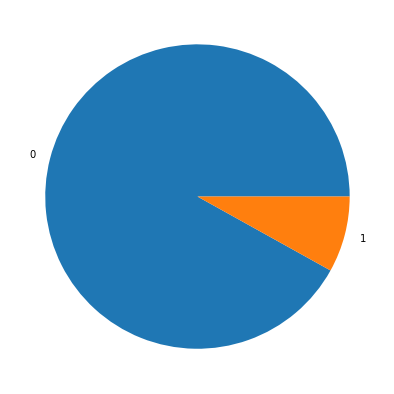

In [20]:
from matplotlib import pyplot as plt
import numpy as np
 
 
# Creating dataset
target = ['0', '1']
 
data = [169611,14895]
 
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = target)
 
# show plot
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
print(dataFrame.shape[0],dataFrame_test.shape[0],dataFrame.shape[1],dataFrame_test.shape[1])


x_train=dataFrame.loc[:, dataFrame.columns != 'TARGET']

y_train=dataFrame['TARGET']

x_test=dataFrame_test

184506 123005 226 225


In [22]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)

x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (339222, 225)
After OverSampling, the shape of train_y: (339222,) 

After OverSampling, counts of label '1': 169611
After OverSampling, counts of label '0': 169611


In [24]:
x_train, x_val, y_train, y_val = train_test_split(x_train_res, y_train_res, test_size = 0.20, random_state = 0)

In [25]:
from lightgbm import LGBMClassifier
from sklearn.feature_selection import SelectFromModel
lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05,
                    num_leaves=32, colsample_bytree=0.2,                                           
                    reg_alpha=3, reg_lambda=1, min_split_gain=0.01,    
                    min_child_weight=40)
embeded_lgb_selector = SelectFromModel(lgbc, max_features=10)
embeded_lgb_selector.fit(x_train, y_train)




model_sk = LGBMClassifier(boosting_type='gbdt', max_depth=7, learning_rate=0.01, n_estimators= 2000, 
                 class_weight='balanced', subsample=0.9, colsample_bytree= 0.8, n_jobs=-1)
train_features, valid_features, train_y, valid_y = train_test_split(x_train_res, y_train_res, test_size = 0.20, random_state = 42)
model_sk.fit(train_features, train_y, early_stopping_rounds=100, eval_set = [(valid_features, valid_y)], eval_metric = 'auc', verbose = 200)



feature_imp = pd.DataFrame(sorted(zip(model_sk.feature_importances_, x_train.columns)), columns=['Value','Feature'])
features_df = feature_imp.sort_values(by="Value", ascending=False)
selected_features = list(features_df[features_df['Value']>=50]['Feature'])
# Saving the selected features into pickle file
# with open('select_features.txt','wb') as fp:
#     pickle.dump(selected_features, fp)
print('The no. of features selected:',len(selected_features))



Training until validation scores don't improve for 100 rounds.
[200]	valid_0's binary_logloss: 0.339604	valid_0's auc: 0.96114
[400]	valid_0's binary_logloss: 0.229249	valid_0's auc: 0.972459
[600]	valid_0's binary_logloss: 0.182281	valid_0's auc: 0.975361
[800]	valid_0's binary_logloss: 0.162228	valid_0's auc: 0.976565
[1000]	valid_0's binary_logloss: 0.153036	valid_0's auc: 0.977208
[1200]	valid_0's binary_logloss: 0.147623	valid_0's auc: 0.977681
[1400]	valid_0's binary_logloss: 0.14414	valid_0's auc: 0.978072
[1600]	valid_0's binary_logloss: 0.141891	valid_0's auc: 0.97835
[1800]	valid_0's binary_logloss: 0.140401	valid_0's auc: 0.978537
[2000]	valid_0's binary_logloss: 0.1394	valid_0's auc: 0.978661
Did not meet early stopping. Best iteration is:
[1999]	valid_0's binary_logloss: 0.139399	valid_0's auc: 0.978662
The no. of features selected: 125


In [26]:
print('Features selected:',selected_features)

x_train = pd.DataFrame(x_train, columns=selected_features)

x_val = pd.DataFrame(x_val, columns=selected_features)


x_test = pd.DataFrame(x_test, columns=selected_features)

x_test_first=x_test['SK_ID_CURR'].to_numpy()


print(x_val.shape,y_val.shape)
print(x_test.shape)
print(x_train.shape,y_train.shape)

Features selected: ['EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'EXT_SOURCE_2', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'AMT_INCOME_TOTAL', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'AMT_ANNUITY', 'AMT_CREDIT', 'CNT_CHILDREN', 'REGION_POPULATION_RELATIVE', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'AMT_REQ_CREDIT_BUREAU_MON', 'DAYS_EMPLOYED', 'AMT_REQ_CREDIT_BUREAU_QRT', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DAYS_REGISTRATION', 'SK_ID_CURR', 'REGION_RATING_CLIENT_W_CITY', 'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_WORK_PHONE', 'CODE_GENDER_F', 'FLAG_OWN_CAR_N', 'ENTRANCES_MODE', 'NAME_EDUCATION_TYPE_Secondary / secondary special', 'FLOORSMAX_MODE', 'REGION_RATING_CLIENT', 'NAME_FAMILY_STATUS_Married', 'FLAG_DOCUMENT_3', 'ORGANIZATION_TYPE_Self-employed', 'TOTALAREA_MODE', 'ORGANIZATION_TYPE_Business Entity Type 3', 'LANDAREA_AVG', 'NAME_INCOME_TYPE_Working', 'OCCUPATION_TYPE_Laborers', 'BASEMENTAREA_MODE', 'FLAG_PHONE', 'NAME_CONTRACT_TYPE_Cash loan

In [27]:
x_train

,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_2,HOUR_APPR_PROCESS_START,EXT_SOURCE_1,AMT_GOODS_PRICE,DAYS_BIRTH,AMT_INCOME_TOTAL,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,...,ORGANIZATION_TYPE_University,OCCUPATION_TYPE_Medicine staff,ORGANIZATION_TYPE_Transport: type 4,ELEVATORS_AVG,FLAG_OWN_REALTY_Y,FLAG_DOCUMENT_14,NAME_INCOME_TYPE_Commercial associate,NAME_TYPE_SUITE_Children,ORGANIZATION_TYPE_Business Entity Type 2,"NAME_TYPE_SUITE_Spouse, partner"
203447,0.458509,0.012998,0.498112,0.441847,0.511566,0.134955,0.690310,0.001378,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.000000
208993,0.489113,0.051311,0.340699,0.385604,0.411882,0.053835,0.950335,0.000545,0.000813,0.000822,...,0.0,0.0,0.0,0.000000,0.282779,0.0,0.000000,0.0,0.0,0.000000
295619,0.232504,0.049927,0.184592,0.587115,0.519049,0.242628,0.677968,0.001557,0.003566,0.003607,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.248181,0.0,0.0,0.000000
263231,0.481253,0.075998,0.235129,0.404354,0.519049,0.147020,0.631556,0.001604,0.000000,0.000000,...,0.0,0.0,0.0,0.004002,0.000000,0.0,0.000000,0.0,0.0,0.000000
61594,0.717267,0.080000,0.676299,0.434783,0.519049,0.068462,0.154302,0.000739,0.002874,0.002907,...,0.0,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122579,0.776279,0.280000,0.159526,0.391304,0.519049,0.221100,0.120596,0.001162,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.000000
304137,0.598522,0.024347,0.510040,0.548203,0.321397,0.102132,0.714934,0.001222,0.014743,0.014915,...,0.0,0.0,0.0,0.125227,1.000000,0.0,0.000000,0.0,0.0,0.608666
152315,0.310436,0.000000,0.471992,0.695652,0.519049,0.102132,0.920732,0.001123,0.017241,0.017442,...,0.0,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.000000
117952,0.220435,0.120000,0.805534,0.521739,0.224705,0.046016,0.725045,0.001700,0.005747,0.002907,...,0.0,0.0,0.0,0.000000,1.000000,0.0,1.000000,0.0,0.0,0.000000


In [28]:
#Function to compute accuracy
def accuracy(pred,test_data):
  correct_pred=0
  for i in range(len(pred)):
    if pred[i]==test_data[i]:
      correct_pred+=1
  acc=(correct_pred/len(pred))*100
  return acc

##**Logistic Regression**

In [29]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model=model.fit(x_train, y_train)
predicted_val_value = model.predict(x_val)
print("Training Accuracy: ",accuracy(predicted_val_value,y_val))

Training Accuracy:  70.55788930650748


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
predicted_test_value = model.predict(x_test)
df1 = pd.DataFrame(data=np.column_stack((x_test_first,predicted_test_value)),columns=['SK_ID_CURR','TARGET'])
df1.to_csv('/content/drive/MyDrive/AI511-HOMELOAN-2022/submission_logistic.csv',index=False) 

In [31]:
df1['TARGET'].value_counts()

0.0    77355
1.0    45650
Name: TARGET, dtype: int64

##**Decision Trees**

In [32]:
from sklearn.datasets import make_classification
from sklearn import tree
 
X, t = make_classification(1000, 5, n_classes=2, shuffle=True, random_state=10)
 
model = tree.DecisionTreeClassifier()
model = model.fit(x_train, y_train)
 
predicted_val_value = model.predict(x_val)
print("Training Accuracy: ",accuracy(predicted_val_value,y_val))


Training Accuracy:  90.3132139435478


In [33]:
predicted_test_value = model.predict(x_test)
df2 = pd.DataFrame(data=np.column_stack((x_test_first,predicted_test_value)),columns=['SK_ID_CURR','TARGET'])
df2.to_csv('/content/drive/MyDrive/AI511-HOMELOAN-2022/submission_tree.csv',index=False) 

In [34]:
df2['TARGET'].value_counts()

1.0    63609
0.0    59396
Name: TARGET, dtype: int64

##**Random Forest**

In [35]:
from sklearn.ensemble import RandomForestClassifier  
model= RandomForestClassifier(n_estimators= 50, criterion="gini",max_features='sqrt',bootstrap=True,)  
model.fit(x_train, y_train)  
RandomForestClassifier(...)
predicted_val_value= model.predict(x_val)  

print("Training Accuracy: ",accuracy(predicted_val_value,y_val))


Training Accuracy:  95.51772422433487


In [36]:
predicted_test_value = model.predict(x_test)
df3 = pd.DataFrame(data=np.column_stack((x_test_first,predicted_test_value)),columns=['SK_ID_CURR','TARGET'])
df3.to_csv('/content/drive/MyDrive/AI511-HOMELOAN-2022/submission_forest.csv',index=False) 

In [37]:
df3['TARGET'].value_counts()

0.0    117433
1.0      5572
Name: TARGET, dtype: int64

##**LGBM Classifier**

In [38]:
import lightgbm as lgb
model = lgb.LGBMClassifier(boosting_type= 'dart',
          max_depth= 10,
          
          nthread= 5,
          num_leaves= 32,
          learning_rate= 0.05,
          max_bin= 512,
          subsample_for_bin= 200,
          subsample= 0.7,
          subsample_freq= 1,
          colsample_bytree= 0.8,
          reg_alpha= 20,
          reg_lambda= 20,
          min_split_gain= 0.5,
          min_child_weight= 1,
          min_child_samples= 10,
          scale_pos_weigh= 1,
          num_class = 1,
          metric = 'auc')
model.fit(x_train,y_train,verbose=20,eval_metric='logloss')


predicted_val_value= model.predict(x_val)  
print("Training Accuracy: ",accuracy(predicted_val_value,y_val))

Training Accuracy:  91.5837570933746


In [39]:
predicted_test_value = model.predict(x_test)
df5 = pd.DataFrame(data=np.column_stack((x_test_first,predicted_test_value)),columns=['SK_ID_CURR','TARGET'])
df5.to_csv('/content/drive/MyDrive/AI511-HOMELOAN-2022/submission_lgbm.csv',index=False)

In [40]:
df5['TARGET'].value_counts()

0.0    71750
1.0    51255
Name: TARGET, dtype: int64

LGBM 2

In [41]:
import numpy as np
weight = np.ones((len(x_train),), dtype=int)
for i in range(len(x_train)):
    if y_train[i]== 0:
        weight[i]=1
    else:
        weight[i]=11

train_data=lgb.Dataset(x_train[selected_features], label = y_train, weight= weight )
valid_data=lgb.Dataset(x_val[selected_features], label = y_val)


params = {'boosting_type': 'gbdt',
          'max_depth' :7,
          'objective': 'binary',
          'nthread': 5,
          'num_leaves': 32,
          'learning_rate': 0.05,
          'max_bin': 512,
          'subsample_for_bin': 200,
          'subsample': 0.7,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'reg_alpha': 20,
          'reg_lambda': 20,
          'min_split_gain': 0.5,
          'min_child_weight': 1,
          'min_child_samples': 10,
          'scale_pos_weight': 1,
          'num_class' : 1,
          'metric' : 'auc'
          }

lgbm = lgb.train(params,
                 train_data,
                 2500,
                 valid_sets=valid_data,
                 early_stopping_rounds= 100,
                 verbose_eval= 10
                 )

# model.fit(x_train,y_train,verbose=20,eval_metric='logloss')
predicted_val_value = model.predict(x_val)


print("Training Accuracy: ",accuracy(predicted_val_value,y_val))

Training until validation scores don't improve for 100 rounds.
[10]	valid_0's auc: 0.917786
[20]	valid_0's auc: 0.930398
[30]	valid_0's auc: 0.944136
[40]	valid_0's auc: 0.955024
[50]	valid_0's auc: 0.960595
[60]	valid_0's auc: 0.964821
[70]	valid_0's auc: 0.967456
[80]	valid_0's auc: 0.969059
[90]	valid_0's auc: 0.970448
[100]	valid_0's auc: 0.971496
[110]	valid_0's auc: 0.972351
[120]	valid_0's auc: 0.972943
[130]	valid_0's auc: 0.973486
[140]	valid_0's auc: 0.973919
[150]	valid_0's auc: 0.974291
[160]	valid_0's auc: 0.97459
[170]	valid_0's auc: 0.974881
[180]	valid_0's auc: 0.975132
[190]	valid_0's auc: 0.9754
[200]	valid_0's auc: 0.975658
[210]	valid_0's auc: 0.975878
[220]	valid_0's auc: 0.976076
[230]	valid_0's auc: 0.976255
[240]	valid_0's auc: 0.976411
[250]	valid_0's auc: 0.976554
[260]	valid_0's auc: 0.976706
[270]	valid_0's auc: 0.976836
[280]	valid_0's auc: 0.976973
[290]	valid_0's auc: 0.977088
[300]	valid_0's auc: 0.977181
[310]	valid_0's auc: 0.977273
[320]	valid_0's auc

In [42]:
predicted_test_value = model.predict(x_test)
df6 = pd.DataFrame(data=np.column_stack((x_test_first,predicted_test_value)),columns=['SK_ID_CURR','TARGET'])
df6.to_csv('/content/drive/MyDrive/AI511-HOMELOAN-2022/submission_lgbm2.csv',index=False)

In [43]:
df6['TARGET'].value_counts()

0.0    71750
1.0    51255
Name: TARGET, dtype: int64

##**Neural Network**

In [44]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers


# model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(len(selected_features),)),
#     keras.layers.Dense(16, activation=tf.nn.relu),
# 	keras.layers.Dense(16, activation=tf.nn.relu),
#     keras.layers.Dense(1, activation=tf.nn.sigmoid),
# ])

model = Sequential() 
model.add(Dense(128, activation='relu', input_dim=len(selected_features)))

model.add(Dense(128, activation='relu'))

model.add(Dense(128, activation='relu'))

model.add(Dense(128, activation='relu'))

model.add(Dense(1, activation='sigmoid')) 

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,y_train, epochs=50, batch_size=16)



predicted_val_value= model.predict(x_val)  
print("Training Accuracy: ",accuracy(predicted_val_value,y_val))



Epoch 1/50
16962/16962 [==============================] - 49s 3ms/step - loss: 0.5136 - accuracy: 0.7464
Epoch 2/50
16962/16962 [==============================] - 48s 3ms/step - loss: 0.4105 - accuracy: 0.8091
Epoch 3/50
16962/16962 [==============================] - 47s 3ms/step - loss: 0.3591 - accuracy: 0.8361
Epoch 4/50
16962/16962 [==============================] - 48s 3ms/step - loss: 0.3274 - accuracy: 0.8519
Epoch 5/50
16962/16962 [==============================] - 50s 3ms/step - loss: 0.3037 - accuracy: 0.8639
Epoch 6/50
16962/16962 [==============================] - 48s 3ms/step - loss: 0.2874 - accuracy: 0.8717
Epoch 7/50
16962/16962 [==============================] - 48s 3ms/step - loss: 0.2739 - accuracy: 0.8788
Epoch 8/50
16962/16962 [==============================] - 49s 3ms/step - loss: 0.2625 - accuracy: 0.8842
Epoch 9/50
16962/16962 [==============================] - 51s 3ms/step - loss: 0.2536 - accuracy: 0.8885
Epoch 10/50
16962/16962 [==============================

KeyboardInterrupt: ignored

In [ ]:
predicted_test_value = model.predict(x_test)
df6 = pd.DataFrame(data=np.column_stack((x_test_first,predicted_test_value)),columns=['SK_ID_CURR','TARGET'])
df6.to_csv('/content/drive/MyDrive/AI511-HOMELOAN-2022/submission_nn.csv',index=False)

In [ ]:
df6['TARGET'].value_counts()

##**SVM**

In [ ]:
# import required libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

classifier = SVC(kernel='rbf',random_state=1,C=1,gamma='auto')
classifier.fit(x_train,y_train)

# perform prediction on x_test data
predicted_val_value = classifier.predict(x_val)

# model.fit(x_train,y_train,verbose=20,eval_metric='logloss')

print("Training Accuracy: ",accuracy(predicted_val_value,y_val))



In [ ]:
predicted_test_value = model.predict(x_test)
df6 = pd.DataFrame(data=np.column_stack((x_test_first,predicted_test_value)),columns=['SK_ID_CURR','TARGET'])
df6.to_csv('/content/drive/MyDrive/AI511-HOMELOAN-2022/submission_svm.csv',index=False)

In [ ]:
df6['TARGET'].value_counts()

##**LGBM With Hypertuning**

In [ ]:
# !pip install optuna

In [ ]:
# import optuna
# from sklearn.model_selection import train_test_split
# import sklearn
# def objective(trial):

#   X_train, X_test, y_train, y_test = train_test_split(x_train_res,y_train_res, stratify = y_train_res, test_size=0.4, random_state=62)
#   dtrain = lgb.Dataset(X_train, label=y_train)

#   param = {
#         "objective": "binary",
#         "metric": "auc",
#         "verbosity": -1,
#         "boosting_type": "gbdt",
#         "max_depth":trial.suggest_int("num_leaves", -2, 10),
#         "min_split_gain":trial.suggest_float("min split g", 0, 20),
       
#         "scale_pos_weight":trial.suggest_int("scale_pos_weight", 1, 17),
#         "learning_rate":trial.suggest_float("subsample_for_bin", 0,10),
#         "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
#         "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
#         "num_leaves": 128,
#         "feature_fraction": trial.suggest_float("feature_fraction", 0.2, 1.0),
#         "bagging_fraction": trial.suggest_float("bagging_fraction", 0.1, 1.0),
#         "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
#         "min_child_samples": trial.suggest_int("min_child_samples", 5, 150),
#     }

#   gbm = lgb.train(param, dtrain)
#   preds = gbm.predict(X_test)
#   pred_labels = np.rint(preds)
#   accuracy = sklearn.metrics.accuracy_score(y_test, pred_labels)
#   return accuracy

In [ ]:
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=200)

In [ ]:
# print("Best trial:")
# trial = study.best_trial

# print("  Value: {}".format(trial.value))

# print("  Params: ")
# for key, value in trial.params.items():
#     print("    {}: {}".format(key, value))